In [24]:
!pip install kaggle

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     -------------- ----------------------- 30.7/82.7 kB 262.6 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/82.7 kB 469.7 kB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 513.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105796 sha256=f5057d4e829bf465444b83c14964acd18ef461f7e1c1031f0e7db6561797ce3b
  Stored in directory: c:\users\abhio\appdata\local\pip\cache\wheels\ff\55\fb\b27a466be754d2a06ffe0e37b248d844f090a63b51becea85d
Successfully built kaggle


In [26]:
import os
import shutil

# Move kaggle.json to ~/.kaggle
if not os.path.exists(os.path.expanduser("~/.kaggle")):
    os.makedirs(os.path.expanduser("~/.kaggle"))
shutil.move("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

# Set permissions
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

In [28]:
!kaggle datasets download -d hijest/genre-classification-dataset-imdb

Dataset URL: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb
License(s): other




  0%|          | 0.00/41.7M [00:00<?, ?B/s]
  2%|2         | 1.00M/41.7M [00:01<00:55, 767kB/s]
  5%|4         | 2.00M/41.7M [00:01<00:27, 1.54MB/s]
  7%|7         | 3.00M/41.7M [00:01<00:16, 2.48MB/s]
 12%|#1        | 5.00M/41.7M [00:01<00:08, 4.61MB/s]
 17%|#6        | 7.00M/41.7M [00:01<00:05, 6.99MB/s]
 24%|##3       | 10.0M/41.7M [00:02<00:03, 10.5MB/s]
 29%|##8       | 12.0M/41.7M [00:02<00:02, 12.2MB/s]
 34%|###3      | 14.0M/41.7M [00:02<00:02, 13.9MB/s]
 38%|###8      | 16.0M/41.7M [00:02<00:01, 15.3MB/s]
 43%|####3     | 18.0M/41.7M [00:02<00:01, 15.5MB/s]
 50%|#####     | 21.0M/41.7M [00:02<00:01, 18.3MB/s]
 55%|#####5    | 23.0M/41.7M [00:02<00:01, 18.7MB/s]
 60%|#####9    | 25.0M/41.7M [00:02<00:00, 18.9MB/s]
 65%|######4   | 27.0M/41.7M [00:02<00:00, 19.3MB/s]
 70%|######9   | 29.0M/41.7M [00:03<00:00, 19.4MB/s]
 74%|#######4  | 31.0M/41.7M [00:03<00:00, 19.6MB/s]
 82%|########1 | 34.0M/41.7M [00:03<00:00, 19.9MB/s]
 86%|########6 | 36.0M/41.7M [00:03<00:00, 19.8MB/s]
 9

In [32]:
import zipfile
with zipfile.ZipFile("genre-classification-dataset-imdb.zip", "r") as zip_ref:
    zip_ref.extractall("genre-classification-dataset-imdb")

# Importing Libraries

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Download NLTK resources

In [106]:
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Abhio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Abhio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading Data and Prepocessing

In [111]:
# Load the training data
train_path = "C:\\Users\\Abhio\\Downloads\\genre-classification-dataset-imdb\\Genre Classification Dataset\\train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [113]:
# Load the test data
test_path = "C:\\Users\\Abhio\\Downloads\\genre-classification-dataset-imdb\\Genre Classification Dataset\\test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')

In [115]:
# Check for null values
print("Null values in training data:")
print(train_data.isnull().sum())
print("\nNull values in test data:")
print(test_data.isnull().sum())

Null values in training data:
Title          0
Genre          0
Description    0
dtype: int64

Null values in test data:
Id             0
Title          0
Description    0
dtype: int64


In [117]:
# Check for duplicate values
print("\nDuplicate values in training data:", train_data.duplicated().sum())
print("Duplicate values in test data:", test_data.duplicated().sum())


Duplicate values in training data: 0
Duplicate values in test data: 0


In [119]:
# Display dataset information
print("\nTraining Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


In [125]:
# Display descriptive statistics
print("\nTraining Data Description:")
train_data.describe(include='all')


Training Data Description:


,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [131]:
print("\nTest Data Description:")
test_data.describe(include='all')


Test Data Description:


,Id,Title,Description
count,54200.000000,54200,54200
unique,NaN,54200,54072
top,NaN,Edgar's Lunch (1998),Grammy - music award of the American academy ...
freq,NaN,1,10
mean,27100.500000,NaN,NaN
std,15646.336632,NaN,NaN
min,1.000000,NaN,NaN
25%,13550.750000,NaN,NaN
50%,27100.500000,NaN,NaN
75%,40650.250000,NaN,NaN


C:\Users\Abhio\AppData\Local\Temp\ipykernel_15700\1811077490.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')


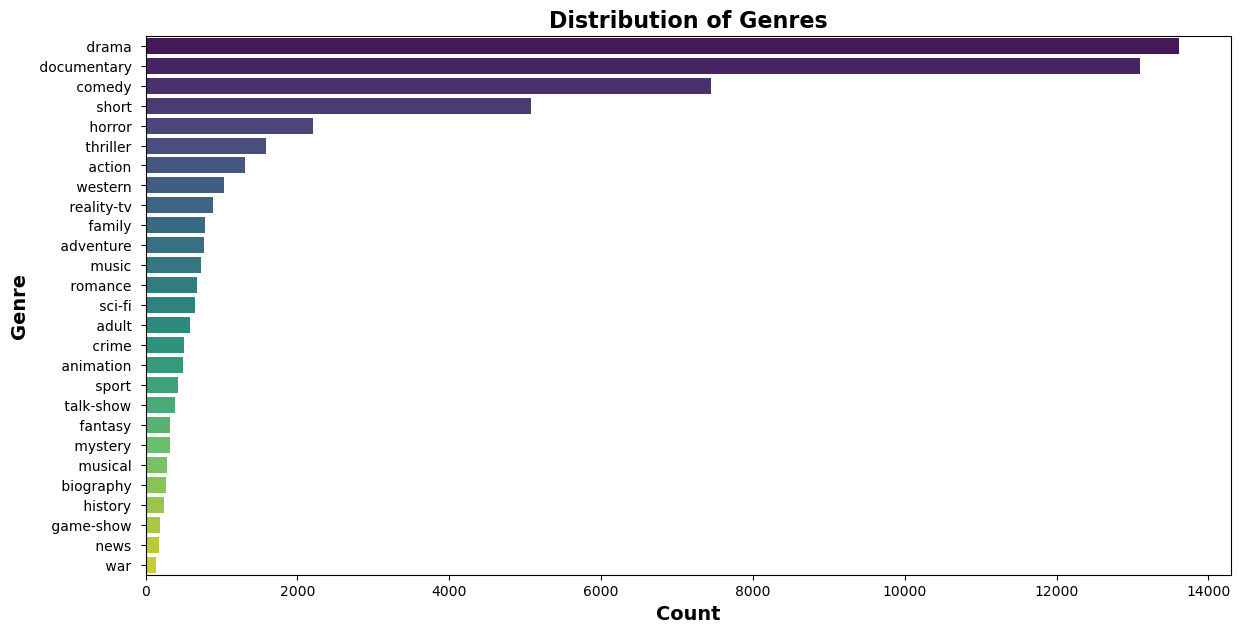

In [133]:
# EDA & Visualization
# Plot the distribution of genres in the training data
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.show()

In [135]:
# Data Preprocessing and Text Cleaning
# Initialize the Snowball and Porter stemmers
snowball_stemmer = SnowballStemmer("english")
porter_stemmer = PorterStemmer()

In [137]:
# cleaning with Snowball and Porter stemmers
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))  # Remove stopwords
    text = " ".join([porter_stemmer.stem(snowball_stemmer.stem(i)) 
                     for i in words if i not in stop_words and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

In [139]:
# Applying the updated clean_text function to the 'Description' column in the training and test data
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

In [141]:
# Calculate the length of cleaned text
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)

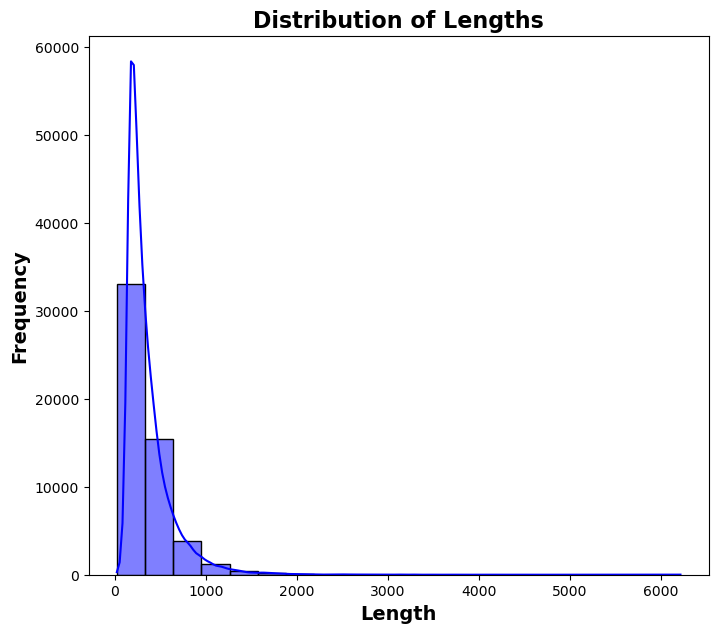

In [143]:
# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

In [145]:
# Text Vectorization Using TF-IDF
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [147]:
# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

In [149]:
# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

In [151]:
# Split Data and Train a Model (Naive Bayes)
# Split the data into training and validation sets
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [155]:
# Make predictions on the validation set
y_pred = classifier.predict(X_val)

In [157]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("\nValidation Accuracy:", accuracy)


Validation Accuracy: 0.44046850502628426


In [159]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Classification Report:


C:\Users\Abhio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.64      0.04      0.08      1443
       crime        0.00      0.00      0.00       107
 documentary        0.52      0.89      0.66      2659
       drama        0.38      0.87      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

C:\Users\Abhio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


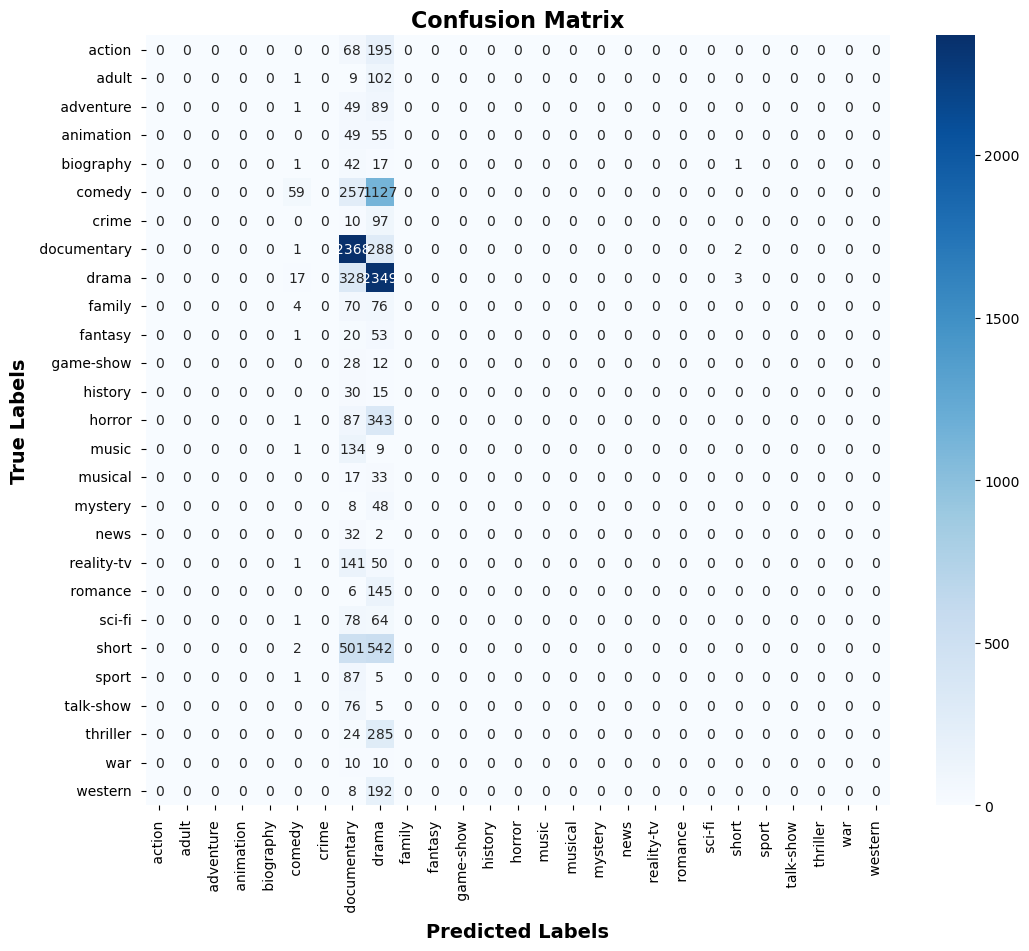

In [161]:
# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred, labels=np.unique(y_val))
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.xlabel('Predicted Labels', fontsize=14, fontweight='bold')
plt.ylabel('True Labels', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

In [163]:
# Make Predictions on the Test Data
# Use the trained model to make predictions on the test data
X_test_predictions = classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [167]:
# Display the 'test_data' DataFrame with predicted genres
print("\nTest Data with Predicted Genres:")
test_data.head()


Test Data with Predicted Genres:


,Id,Title,Description,Text_cleaning,Predicted_Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane love life car apart job especi girlfrien...,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughti child three belong w...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin famili shepherd north tran...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father die hasnt spoken brother year seriou ca...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known intern martial art superstar bruce lee a...,drama


In [169]:
# Save the test_data DataFrame with predicted genres to a CSV file
test_data.to_csv('predicted_genres.csv', index=False)